# 4. Merging species counts tables into one counts table for all species

In [1]:
import os
import pandas as pd
import numpy as np
# requires dammit env
# source activate dammit
from dammit.fileio.gff3 import GFF3Parser
%matplotlib inline
import pylab as plt
from matplotlib_venn import venn2

In [2]:
gene_out_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/tximport_counts/"
genes_matrices = os.listdir(gene_out_dir)
print(genes_matrices)

['F_heteroclitusMDPP_counts.csv', 'F_parvapinis_counts.csv', 'F_olivaceous_counts.csv', 'F_notatus_counts.csv', 'F_heteroclitusMDPL_counts.csv', 'F_notti_counts.csv', 'F_grandis_counts.csv', 'F_zebrinus_counts.csv', 'A_xenica_counts.csv', 'F_catanatus_counts.csv', 'F_sciadicus_counts.csv', 'F_rathbuni_counts.csv', 'F_chrysotus_counts.csv', 'F_diaphanus_counts.csv', 'L_goodei_counts.csv', 'F_similis_counts.csv']


In [3]:
test = pd.read_csv(gene_out_dir + 'F_heteroclitusMDPP_counts.csv')
test = test.rename(columns={'Unnamed: 0': 'OG'})

In [4]:
test.tail()

,OG,F_heteroclitusMDPP_BW_1,F_heteroclitusMDPP_BW_2,F_heteroclitusMDPP_BW_3,F_heteroclitusMDPP_FW_1,F_heteroclitusMDPP_FW_2,F_heteroclitusMDPP_FW_3,F_heteroclitusMDPP_transfer_1,F_heteroclitusMDPP_transfer_2,F_heteroclitusMDPP_transfer_3
44788,OG0091035,9.462,7.160,8.965,7.367,0.000,0.0,2.769,0.0,2.683
44789,OG0091036,0.000,0.000,0.000,64.152,0.000,0.0,26.498,0.0,0.000
44790,OG0091037,10.956,5.424,0.000,1.623,0.000,0.0,2.914,0.0,0.000
44791,OG0091038,0.000,0.000,0.000,1.034,1.155,0.0,0.000,0.0,0.000
44792,OG0091039,0.000,0.000,0.000,15.000,1.000,0.0,16.000,0.0,0.000


29545


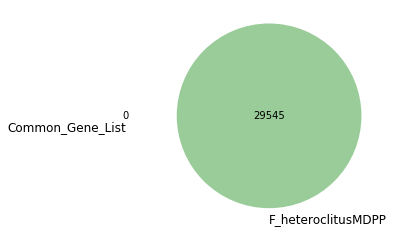

38220


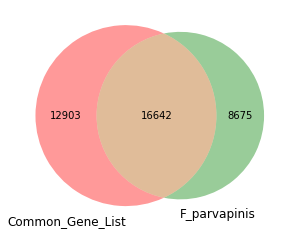

44852


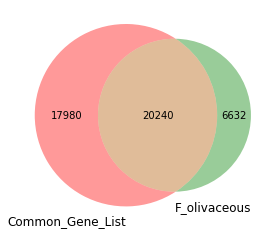

50684


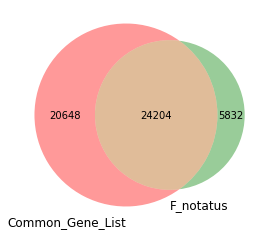

55384


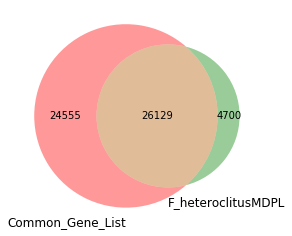

56921


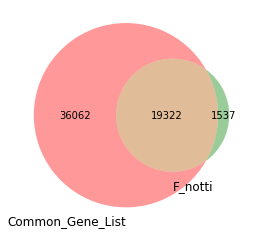

62802


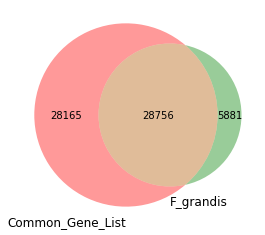

64353


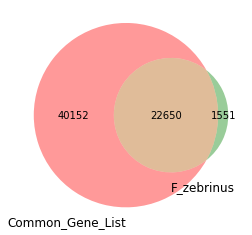

66465


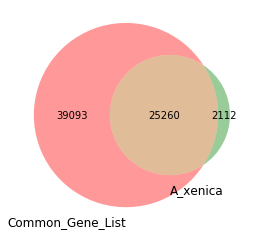

69229


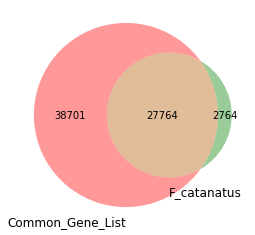

70256


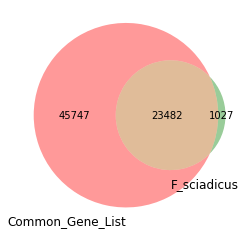

72825


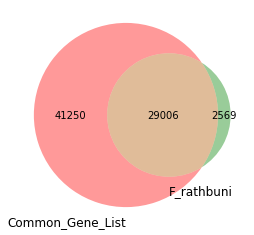

74430


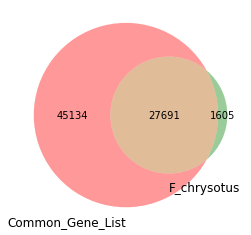

75358


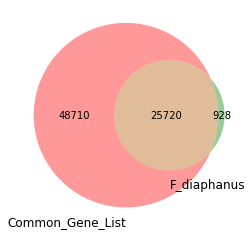

76789


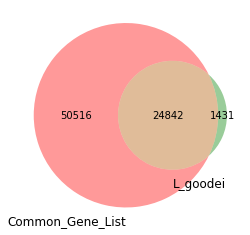

77499


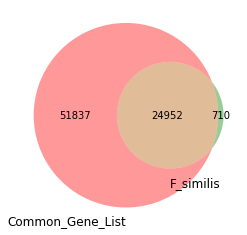

In [5]:
gene_list_common = []
# construct common gene list (union)
for genes_file in genes_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        table = table.rename(columns={'Unnamed: 0': 'OG'})
        # if countsvalue is >5 in any column, then keep
        table_filt = table[(table.iloc[:,1:] > 10).any(1)]
        species_genes = table_filt['OG'].tolist()
        #species_genes = [item for sublist in species_genes for item in sublist]
        a = set(species_genes)
        b = set(gene_list_common)
        gene_list_common = list(a | b)
        print(len(gene_list_common))
        gene_list_common.extend(gene_list_common)
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()
# construct unique gene list ()

In [6]:
print(len(gene_list_common))
print(len(set(gene_list_common)))

154998
77499


40454


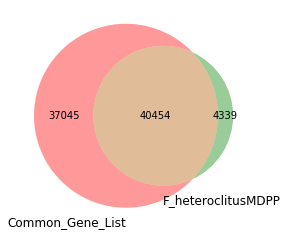

34192


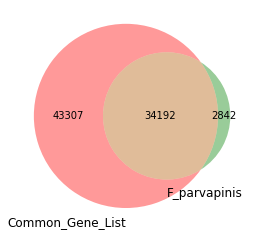

36682


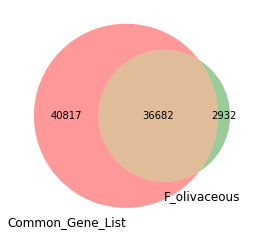

39336


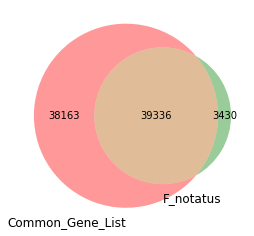

41069


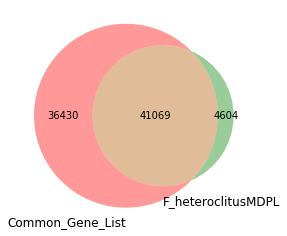

26636


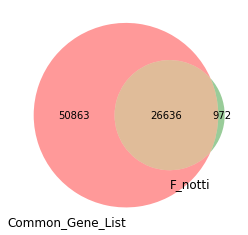

45474


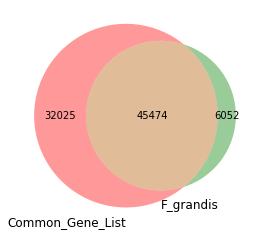

32399


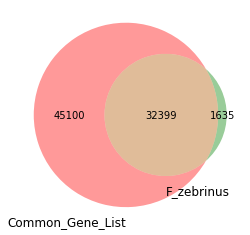

36768


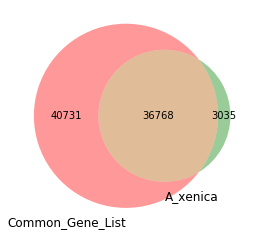

39295


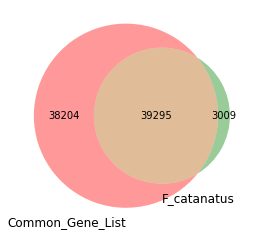

31713


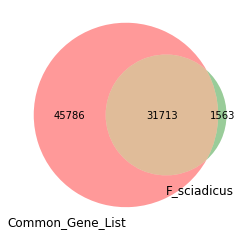

41076


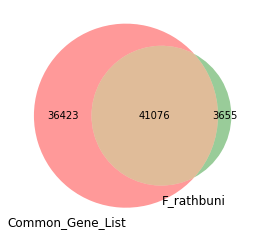

38025


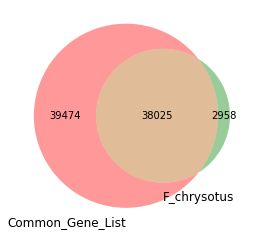

36391


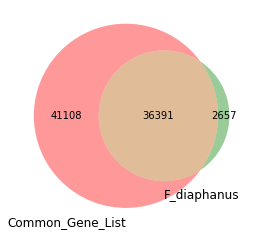

35328


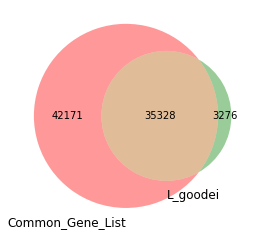

36422


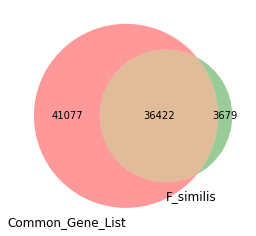

In [7]:
# only genes that are in common across all species
for genes_file in genes_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        table = table.rename(columns={'Unnamed: 0': 'OG'})
        table_filt = table[(table.iloc[:,1:] > 10).any(1)]
        species_genes = table['OG'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [8]:
print(genes_matrices)
print(len(genes_matrices))

['F_heteroclitusMDPP_counts.csv', 'F_parvapinis_counts.csv', 'F_olivaceous_counts.csv', 'F_notatus_counts.csv', 'F_heteroclitusMDPL_counts.csv', 'F_notti_counts.csv', 'F_grandis_counts.csv', 'F_zebrinus_counts.csv', 'A_xenica_counts.csv', 'F_catanatus_counts.csv', 'F_sciadicus_counts.csv', 'F_rathbuni_counts.csv', 'F_chrysotus_counts.csv', 'F_diaphanus_counts.csv', 'L_goodei_counts.csv', 'F_similis_counts.csv']
16


In [9]:
count = 0
gene_list_common = []
for genes_file1 in genes_matrices:
    if genes_file1.endswith(".csv"):
        species1 = genes_file1.split("_")[0]+"_"+genes_file1.split("_")[1]
        for genes_file2 in genes_matrices:
            if genes_file2 != genes_file1:
                if genes_file2.endswith(".csv"):
                    species2 = genes_file2.split("_")[0]+"_"+genes_file2.split("_")[1]
                    table1 = pd.read_csv(gene_out_dir+genes_file1)
                    table1 = table1.rename(columns={'Unnamed: 0': 'OG'})
                    table1_filt = table1[(table1.iloc[:,1:] > 10).any(1)]
                    table2 = pd.read_csv(gene_out_dir+genes_file2)
                    table2 = table2.rename(columns={'Unnamed: 0': 'OG'})
                    table2_filt = table2[(table2.iloc[:,1:] > 10).any(1)]
                    species_genes1 = table1_filt['OG'].tolist()
                    species_genes2 = table2_filt['OG'].tolist()
                    a = set(species_genes1)
                    b = set(species_genes2)
                    genes_list = list(a | b)
                    print(len(genes_list))
                    gene_list_common.extend(genes_list)
#difference=filter(lambda x:x not in list2,list1)

38220
39151
41509
39777
35263
44249
37136
39374
41620
37291
42392
40836
38550
38709
37907
38220
36033
38483
39114
31768
42419
33776
35983
38816
33921
39747
37727
35842
35466
34849
39151
36033
37924
39900
32724
43195
34717
37066
39342
34664
40254
38239
36579
36506
35784
41509
38483
37924
42170
35606
45271
37314
39517
41574
37303
42451
40466
39094
38887
38326
39777
39114
39900
42170
36288
44749
38058
40000
42266
38159
43049
41537
39481
39447
38776
35263
31768
32724
35606
36288
39898
30323
33264
36030
30473
36981
34317
32638
32566
31740
44249
42419
43195
45271
44749
39898
41478
43155
45208
41561
46030
44571
42782
42764
42043
37136
33776
34717
37314
38058
30323
41478
35232
37711
32664
38698
36588
34550
34469
33695
39374
35983
37066
39517
40000
33264
43155
35232
39850
35297
40778
38861
37041
36692
36120
41620
38816
39342
41574
42266
36030
45208
37711
39850
37720
42271
40886
38955
39196
38540
37291
33921
34664
37303
38159
30473
41561
32664
35297
37720
38631
36501
34649
34622
33931
42392
3974

In [10]:
gene_list_common_intersect = gene_list_common
print(len(gene_list_common_intersect))
print(len(set(gene_list_common)))
gene_list_common = list(set(gene_list_common))

9173930
77499


40454


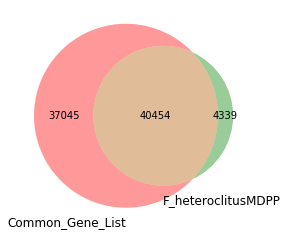

34192


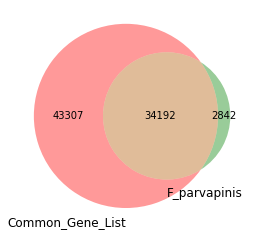

36682


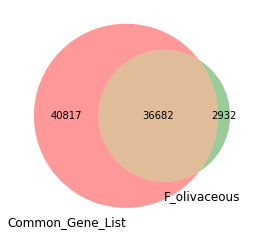

39336


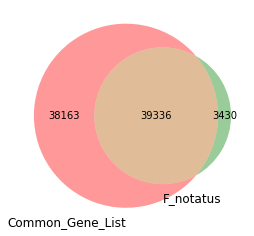

41069


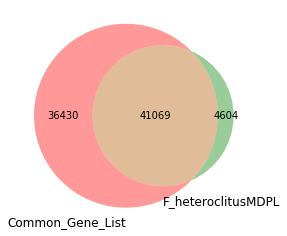

26636


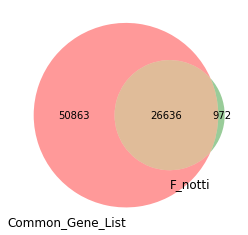

45474


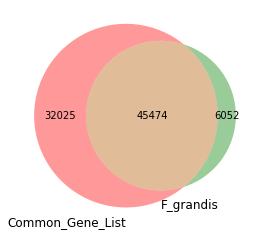

32399


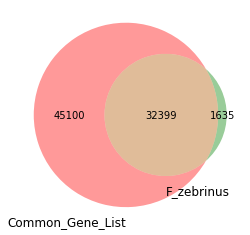

36768


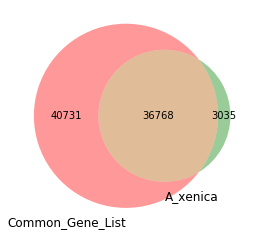

39295


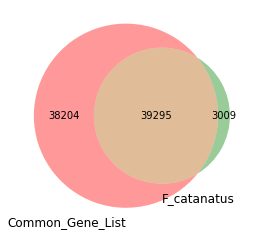

31713


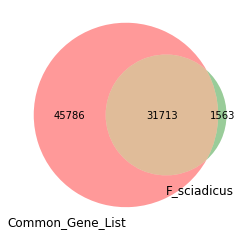

41076


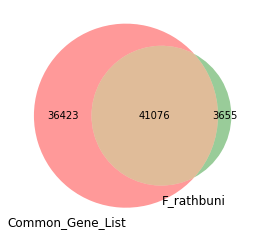

38025


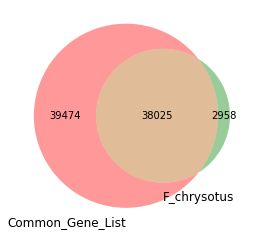

36391


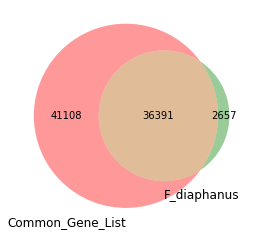

35328


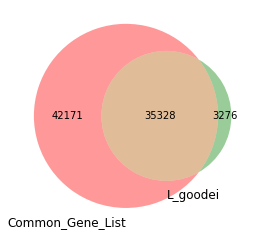

36422


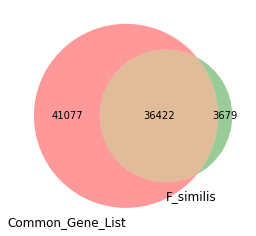

In [11]:
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        table = table.rename(columns={'Unnamed: 0': 'OG'})
        species_genes = table['OG'].tolist()
        a = set(species_genes)
        b = set(gene_list_common_intersect)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [12]:
species_counts = pd.DataFrame()
species_counts['OG'] = ""  
for genes_file in genes_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        print("========")
        print(species)
        print("========")
        table = pd.read_csv(gene_out_dir+genes_file)
        table = table.rename(columns={'Unnamed: 0': 'OG'})
        counts = table[table['OG'].isin(gene_list_common)]
        cols = counts.columns.tolist()
        colnames = ['OG']
        for i in cols:
            if i.startswith(species):
                colnames.append(i)
        counts = counts[colnames]
        species_counts = pd.merge(species_counts,counts,on='OG',how='outer')
        print(species_counts.shape)

F_heteroclitusMDPP
(40454, 10)
F_parvapinis
(49630, 18)
F_olivaceous
(56581, 26)
F_notatus
(61465, 35)
F_heteroclitusMDPL
(65208, 44)
F_notti
(66575, 46)
F_grandis
(70414, 55)
F_zebrinus
(71643, 59)
A_xenica
(72874, 68)
F_catanatus
(74402, 75)
F_sciadicus
(74952, 79)
F_rathbuni
(75997, 88)
F_chrysotus
(76429, 96)
F_diaphanus
(76641, 102)
L_goodei
(77420, 111)
F_similis
(77499, 120)


In [13]:
species_counts = species_counts.fillna(0)

In [14]:
species_counts.head()

,OG,F_heteroclitusMDPP_BW_1,F_heteroclitusMDPP_BW_2,F_heteroclitusMDPP_BW_3,F_heteroclitusMDPP_FW_1,F_heteroclitusMDPP_FW_2,F_heteroclitusMDPP_FW_3,F_heteroclitusMDPP_transfer_1,F_heteroclitusMDPP_transfer_2,F_heteroclitusMDPP_transfer_3,...,L_goodei_transfer_3,F_similis_BW_1,F_similis_BW_2,F_similis_BW_3,F_similis_FW_1,F_similis_FW_2,F_similis_FW_3,F_similis_transfer_1,F_similis_transfer_2,F_similis_transfer_3
0,OG0000000,1.000,0.0,2.0,2.0,1.0,7.0,0.0,1.0,8.0,...,1.000,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.00,0.0
1,OG0000001,3.412,2.0,4.0,6.0,1.0,2.0,0.0,2.0,1.0,...,3.000,2.0,1.0,3.000,2.0,1.000,1.0,9.0,0.00,2.0
2,OG0000002,0.000,4.0,0.0,3.0,4.0,2.0,2.0,0.0,0.0,...,20.062,1.0,0.0,0.000,1.0,0.000,1.0,0.0,0.00,0.0
3,OG0000003,0.000,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,2.000,0.0,0.0,2.197,0.0,1.474,0.0,0.0,2.44,0.0
4,OG0000004,0.000,0.0,0.0,9.5,0.0,0.0,5.0,0.0,0.0,...,0.000,1.0,1.0,4.000,1.0,0.000,0.0,0.0,1.00,1.0


In [15]:
species_counts.shape

(77499, 120)

In [16]:
species_filt = species_counts[(species_counts.iloc[:,1:] > 10).any(1)]

In [17]:
species_filt.shape

(77499, 120)

In [59]:
species_counts.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/OG_species_counts.csv",index=False,index_label=None)

## Extra code leftover from NCBI annotations (don't use for OGs)

In [152]:
cols = species_protein_ID.columns.tolist()
colnames = ['NCBIproteinID','NCBIscaffold','product','gene']
for i in cols:
    if i.endswith(".quant"):
        colnames.append(i)
species_counts_real = species_protein_ID[colnames]

In [153]:
species_counts_real.shape

(27775, 132)

In [154]:
species_counts_real.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/16killifish_counts_RNAseq_filtered_16October2018.csv")

In [155]:
species_counts_real.head()
species_counts_real.shape

(27775, 132)

In [156]:
species_counts_test = species_counts_real

In [157]:
species_counts_real.shape

(27775, 132)

In [158]:
species_counts_test.shape

(27775, 132)

In [159]:
species_counts_real.head()

,NCBIproteinID,NCBIscaffold,product,gene,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,A_xenica_FW_1.quant,A_xenica_FW_2.quant,A_xenica_FW_3.quant,A_xenica_transfer_1.quant,A_xenica_transfer_2.quant,A_xenica_transfer_3.quant,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,L_goodei_FW_3.quant,L_goodei_transfer_1.quant,L_goodei_transfer_2.quant,L_goodei_transfer_3.quant,F_heteroclitusMDPP_BW_1.quant,F_heteroclitusMDPP_BW_2.quant,F_heteroclitusMDPP_BW_3.quant,F_heteroclitusMDPP_FW_1.quant,F_heteroclitusMDPP_FW_2.quant,F_heteroclitusMDPP_FW_3.quant,F_heteroclitusMDPP_transfer_1.quant,F_heteroclitusMDPP_transfer_2.quant,F_heteroclitusMDPP_transfer_3.quant,L_parva_BW_1.quant,L_parva_BW_2.quant,L_parva_BW_3.quant,L_parva_FW_1.quant,L_parva_FW_2.quant,L_parva_FW_3.quant,L_parva_transfer_1.quant,L_parva_transfer_2.quant,L_parva_transfer_3.quant,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,F_notatus_BW_1.quant,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant,F_olivaceous_BW_1.quant,F_olivaceous_BW_2.quant,F_olivaceous_BW_3.quant,F_olivaceous_FW_1.quant,F_olivaceous_FW_2.quant,F_olivaceous_FW_3.quant,F_olivaceous_transfer_1.quant,F_olivaceous_transfer_2.quant,F_grandis_BW_1.quant,F_grandis_BW_2.quant,F_grandis_BW_3.quant,F_grandis_FW_1.quant,F_grandis_FW_2.quant,F_grandis_FW_3.quant,F_grandis_transfer_1.quant,F_grandis_transfer_2.quant,F_grandis_transfer_3.quant,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,F_zebrinus_BW_1.quant,F_zebrinus_BW_2.quant,F_zebrinus_FW_1.quant,F_zebrinus_FW_2.quant,F_similis_BW_1.quant,F_similis_BW_2.quant,F_similis_BW_3.quant,F_similis_FW_1.quant,F_similis_FW_2.quant,F_similis_FW_3.quant,F_similis_transfer_1.quant,F_similis_transfer_2.quant,F_similis_transfer_3.quant,F_notti_FW_1.quant,F_notti_FW_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant
0,XP_012704699.1,NW_012224512.1,biogenesis of lysosome-related organelles comp...,bloc1s1,93.000000,116.000000,122.000001,153.00000,179.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,113.000000,216.000000,212.000000,83.000000,516.968541,397.000000,580.000000,100.000000,161.0,86.0,189.000000,57.0,38.999999,78.0,48.999999,101.0,277.294571,329.0,165.227518,250.0,143.160386,170.000000,110.590974,213.904699,159.000001,136.999999,104.000000,130.0,122.000000,150.999999,115.0,324.000001,324.000000,142.0,381.019700,107.280651,74.748687,145.885094,359.088367,129.000000,459.000000,91.000000,149.000000,266.000000,381.000000,173.000000,180.000000,243.0,199.000000,238.911172,298.000000,1033.000000,305.0,414.000000,175.000000,305.000000,262.000000,97.622057,27.0,133.0,

In [160]:
cols = species_counts_real.columns.tolist()

In [161]:
cols = cols[4:]

In [162]:
cols

['F_diaphanus_BW_1.quant',
 'F_diaphanus_BW_2.quant',
 'F_diaphanus_FW_2.quant',
 'F_diaphanus_FW_3.quant',
 'F_diaphanus_transfer_1.quant',
 'F_diaphanus_transfer_2.quant',
 'A_xenica_BW_1.quant',
 'A_xenica_BW_2.quant',
 'A_xenica_BW_3.quant',
 'A_xenica_FW_1.quant',
 'A_xenica_FW_2.quant',
 'A_xenica_FW_3.quant',
 'A_xenica_transfer_1.quant',
 'A_xenica_transfer_2.quant',
 'A_xenica_transfer_3.quant',
 'F_catanatus_BW_1.quant',
 'F_catanatus_BW_2.quant',
 'F_catanatus_BW_3.quant',
 'F_catanatus_FW_1.quant',
 'F_catanatus_FW_2.quant',
 'F_catanatus_transfer_1.quant',
 'F_catanatus_transfer_2.quant',
 'L_goodei_BW_1.quant',
 'L_goodei_BW_2.quant',
 'L_goodei_BW_3.quant',
 'L_goodei_FW_1.quant',
 'L_goodei_FW_2.quant',
 'L_goodei_FW_3.quant',
 'L_goodei_transfer_1.quant',
 'L_goodei_transfer_2.quant',
 'L_goodei_transfer_3.quant',
 'F_heteroclitusMDPP_BW_1.quant',
 'F_heteroclitusMDPP_BW_2.quant',
 'F_heteroclitusMDPP_BW_3.quant',
 'F_heteroclitusMDPP_FW_1.quant',
 'F_heteroclitusMDPP_

In [163]:
len(cols)

128

# Design rows

In [20]:
cols = species_counts.columns.tolist()

In [21]:
print(cols)

['OG', 'F_heteroclitusMDPP_BW_1', 'F_heteroclitusMDPP_BW_2', 'F_heteroclitusMDPP_BW_3', 'F_heteroclitusMDPP_FW_1', 'F_heteroclitusMDPP_FW_2', 'F_heteroclitusMDPP_FW_3', 'F_heteroclitusMDPP_transfer_1', 'F_heteroclitusMDPP_transfer_2', 'F_heteroclitusMDPP_transfer_3', 'F_parvapinis_BW_1', 'F_parvapinis_BW_2', 'F_parvapinis_BW_3', 'F_parvapinis_FW_1', 'F_parvapinis_FW_2', 'F_parvapinis_FW_3', 'F_parvapinis_transfer_1', 'F_parvapinis_transfer_2', 'F_olivaceous_BW_1', 'F_olivaceous_BW_2', 'F_olivaceous_BW_3', 'F_olivaceous_FW_1', 'F_olivaceous_FW_2', 'F_olivaceous_FW_3', 'F_olivaceous_transfer_1', 'F_olivaceous_transfer_2', 'F_notatus_BW_1', 'F_notatus_BW_2', 'F_notatus_BW_3', 'F_notatus_FW_1', 'F_notatus_FW_2', 'F_notatus_FW_3', 'F_notatus_transfer_1', 'F_notatus_transfer_2', 'F_notatus_transfer_3', 'F_heteroclitusMDPL_BW_1', 'F_heteroclitusMDPL_BW_2', 'F_heteroclitusMDPL_BW_3', 'F_heteroclitusMDPL_FW_1', 'F_heteroclitusMDPL_FW_2', 'F_heteroclitusMDPL_FW_3', 'F_heteroclitusMDPL_transfer_1

In [18]:
clade_design = {"A_xenica":"Clade3","F_catanatus":"Clade1","F_chrysotus":"Clade3",
 "F_diaphanus":"Clade1","F_grandis":"Clade1","F_heteroclitusMDPL":"Clade1",
 "F_heteroclitusMDPP":"Clade1","F_notatus":"Clade3","F_notti":"Clade3",
 "F_olivaceous":"Clade3","F_parvapinis":"Clade2","F_rathbuni":"Clade1",
 "F_sciadicus":"Clade3","F_similis":"Clade1","F_zebrinus":"Clade3",
 "L_goodei":"Clade2","L_parva":"Clade2"}
combined_design = {"A_xenica":"M_Clade3","F_catanatus":"FW_Clade1","F_chrysotus":"BW_Clade3",
 "F_diaphanus":"BW_Clade1","F_grandis":"M_Clade1","F_heteroclitusMDPL":"M_Clade1",
 "F_heteroclitusMDPP":"M_Clade1","F_notatus":"FW_Clade3","F_notti":"FW_Clade3",
 "F_olivaceous":"FW_Clade3","F_parvapinis":"BW_Clade2","F_rathbuni":"FW_Clade1",
 "F_sciadicus":"FW_Clade3","F_similis":"M_Clade1","F_zebrinus":"M_Clade3",
 "L_goodei":"FW_Clade2","L_parva":"M_Clade2"}
phys_design = {"A_xenica":"M","F_catanatus":"FW","F_chrysotus":"BW",
 "F_diaphanus":"BW","F_grandis":"M","F_heteroclitusMDPL":"M",
 "F_heteroclitusMDPP":"M","F_notatus":"FW","F_notti":"FW",
 "F_olivaceous":"FW","F_parvapinis":"BW","F_rathbuni":"FW",
 "F_sciadicus":"FW","F_similis":"M","F_zebrinus":"M",
 "L_goodei":"FW","L_parva":"M"}

In [25]:
species_list = ['Empty']
physiology_list = ['Empty']
clade_list = ['Empty']
combined_list = ['Empty']
condition_list = ['Empty']
for col in cols:
    if col != "OG":
        species = col.split("_")[0]+"_"+col.split("_")[1]
        condition = col.split("_")[2]
        if condition == "BW":
            condition = "15_ppt"
        if condition == "FW":
            condition = "0.2_ppt"
        condition_list.append(condition)
        species_list.append(species)
        physiology = phys_design[species]
        physiology_list.append(physiology)
        clade = clade_design[species]
        clade_list.append(clade)
        design = combined_design[species]
        combined_list.append(design)
print(len(species_list))
print(len(physiology_list))
print(len(clade_list))
print(len(combined_list))
print(len(condition_list))

120
120
120
120
120


In [26]:
species_counts.columns

Index(['OG', 'F_heteroclitusMDPP_BW_1', 'F_heteroclitusMDPP_BW_2',
       'F_heteroclitusMDPP_BW_3', 'F_heteroclitusMDPP_FW_1',
       'F_heteroclitusMDPP_FW_2', 'F_heteroclitusMDPP_FW_3',
       'F_heteroclitusMDPP_transfer_1', 'F_heteroclitusMDPP_transfer_2',
       'F_heteroclitusMDPP_transfer_3',
       ...
       'L_goodei_transfer_3', 'F_similis_BW_1', 'F_similis_BW_2',
       'F_similis_BW_3', 'F_similis_FW_1', 'F_similis_FW_2', 'F_similis_FW_3',
       'F_similis_transfer_1', 'F_similis_transfer_2', 'F_similis_transfer_3'],
      dtype='object', length=120)

In [28]:
species_counts.shape

(77499, 120)

In [27]:
df = pd.DataFrame([species_list],columns=species_counts.columns)
df2 = pd.DataFrame([physiology_list],columns=species_counts.columns)
df3 = pd.DataFrame([clade_list],columns=species_counts.columns)
df4 = pd.DataFrame([combined_list],columns=species_counts.columns)
df5 = pd.DataFrame([condition_list],columns=species_counts.columns)
print(df.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
#df.head()
species_counts_real = species_counts.append(df)
species_counts_real = species_counts_real.append(df2)
species_counts_real = species_counts_real.append(df3)
species_counts_real = species_counts_real.append(df4)
species_counts_real = species_counts_real.append(df5)
print(species_counts_real.shape)

(1, 120)
(1, 120)
(1, 120)
(1, 120)
(1, 120)
(77504, 120)


In [29]:
pd.set_option('display.max_columns',500)
species_counts_real.tail(5)

,OG,F_heteroclitusMDPP_BW_1,F_heteroclitusMDPP_BW_2,F_heteroclitusMDPP_BW_3,F_heteroclitusMDPP_FW_1,F_heteroclitusMDPP_FW_2,F_heteroclitusMDPP_FW_3,F_heteroclitusMDPP_transfer_1,F_heteroclitusMDPP_transfer_2,F_heteroclitusMDPP_transfer_3,F_parvapinis_BW_1,F_parvapinis_BW_2,F_parvapinis_BW_3,F_parvapinis_FW_1,F_parvapinis_FW_2,F_parvapinis_FW_3,F_parvapinis_transfer_1,F_parvapinis_transfer_2,F_olivaceous_BW_1,F_olivaceous_BW_2,F_olivaceous_BW_3,F_olivaceous_FW_1,F_olivaceous_FW_2,F_olivaceous_FW_3,F_olivaceous_transfer_1,F_olivaceous_transfer_2,F_notatus_BW_1,F_notatus_BW_2,F_notatus_BW_3,F_notatus_FW_1,F_notatus_FW_2,F_notatus_FW_3,F_notatus_transfer_1,F_notatus_transfer_2,F_notatus_transfer_3,F_heteroclitusMDPL_BW_1,F_heteroclitusMDPL_BW_2,F_heteroclitusMDPL_BW_3,F_heteroclitusMDPL_FW_1,F_heteroclitusMDPL_FW_2,F_heteroclitusMDPL_FW_3,F_heteroclitusMDPL_transfer_1,F_heteroclitusMDPL_transfer_2,F_heteroclitusMDPL_transfer_3,F_notti_FW_1,F_notti_FW_2,F_grandis_BW_1,F_grandis_BW_2,F_grandis_BW_3,F_grandis_FW_1,F_grandis_FW_2,F_grandis_FW_3,F_grandis_transfer_1,F_grandis_transfer_2,F_grandis_transfer_3,F_zebrinus_BW_1,F_zebrinus_BW_2,F_zebrinus_FW_1,F_zebrinus_FW_2,A_xenica_BW_1,A_xenica_BW_2,A_xenica_BW_3,A_xenica_FW_1,A_xenica_FW_2,A_xenica_FW_3,A_xenica_transfer_1,A_xenica_transfer_2,A_xenica_transfer_3,F_catanatus_BW_1,F_catanatus_BW_2,F_catanatus_BW_3,F_catanatus_FW_1,F_catanatus_FW_2,F_catanatus_transfer_1,F_catanatus_transfer_2,F_sciadicus_BW_1,F_sciadicus_FW_1,F_sciadicus_FW_2,F_sciadicus_transfer_1,F_rathbuni_BW_1,F_rathbuni_BW_2,F_rathbuni_BW_3,F_rathbuni_FW_1,F_rathbuni_FW_2,F_rathbuni_FW_3,F_rathbuni_transfer_1,F_rathbuni_transfer_2,F_rathbuni_transfer_3,F_chrysotus_BW_1,F_chrysotus_BW_2,F_chrysotus_BW_3,F_chrysotus_FW_1,F_chrysotus_FW_2,F_chrysotus_FW_3,F_chrysotus_transfer_1,F_chrysotus_transfer_2,F_diaphanus_BW_1,F_diaphanus_BW_2,F_diaphanus_FW_2,F_diaphanus_FW_3,F_diaphanus_transfer_1,F_diaphanus_transfer_2,L_goodei_BW_1,L_goodei_BW_2,L_goodei_BW_3,L_goodei_FW_1,L_goodei_FW_2,L_goodei_FW_3,L_goodei_transfer_1,L_goodei_transfer_2,L_goodei_transfer_3,F_similis_BW_1,F_similis_BW_2,F_similis_BW_3,F_similis_FW_1,F_similis_FW_2,F_similis_FW_3,F_similis_transfer_1,F_similis_transfer_2,F_similis_transfer_3
0,Empty,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_heteroclitusMDPL,F_notti,F_notti,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_zebrinus,F_zebrinus,F_zebrinus,F_zebrinus,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_sciadicus,F_sciadicus,F_sciadicus,F_sciadicus,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_chrysotus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,F_similis,F_similis,F_similis,F_similis,F_similis,F_similis,F_similis,F_similis,F_similis
0,Empty,M,M,M,M,M,M,M,M,M,BW,BW,BW,BW,BW,BW,BW,BW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,M,M,M,M,M,M,M,M,M,FW,FW,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,FW,BW,BW,BW,BW,BW,BW,BW,BW,BW,BW,BW,BW,BW,BW,FW,FW,FW,FW,FW,FW,FW,FW,FW,M,M

In [30]:
species_counts_real.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/OG_species_counts_designfactors.csv")

In [31]:
species_counts_real.shape

(77504, 120)